In [1]:
#chunk 1
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import os
import re

In [2]:
#chunk 2
file_path = "listado_apartamentos_zona_14.csv"
if os.path.exists(file_path):
    os.remove(file_path)

In [3]:
# Chunk 3

URL = "https://mapainmueble.com/apartamentos-en-alquiler-zona-14/"
response = requests.get(URL)

if response.status_code == 200:
    print("Conexión exitosa.")
else:
    print(f"Error al conectar con la página: status code {response.status_code}")



Conexión exitosa.


In [4]:
# Chunk 4
url_base = "https://mapainmueble.com/apartamentos-en-alquiler-zona-14/"
navegador_simulado = {"User-Agent": "Mozilla/5.0"}
listado_apartamentos = []  


In [5]:
# Chunk 5
for numero_pagina in range(0, 21): 
    url_completa = f"{url_base}page/{numero_pagina}/" if numero_pagina > 1 else url_base
    print(f"Accediendo a {url_completa}")
    response = requests.get(url_completa, headers=navegador_simulado)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
  
        apartamentos = soup.find_all("div", class_="property_listing property_card_default")
        for apartamento in apartamentos:
            precio = apartamento.find("div", class_="listing_unit_price_wrapper").text.strip().split("\n")[0] if apartamento.find("div", class_="listing_unit_price_wrapper") else 'Sin Precio'
            dormitorios = apartamento.find("span", class_="inforoom").text.strip() if apartamento.find("span", class_="inforoom") else 'Info no disponible'
            nombre = apartamento.find("a").text.strip() if apartamento.find("a") else 'Sin Título'
            tamano_en_mt2 = apartamento.find("span", class_="infosize").text.strip().split(" ")[0] if apartamento.find("span", class_="infosize") else 'Info no disponible'
            habitaciones = apartamento.find("span", class_="inforoom").text.strip() if apartamento.find("span", class_="inforoom") else 'Info no disponible'
            sanitarios = apartamento.find("span", class_="infobath").text.strip() if apartamento.find("span", class_="infobath") else 'Info no disponible'
            parqueos = apartamento.find("span", class_="infoParking").text.strip() if apartamento.find("span", class_="infoParking") else 'Info no disponible'
            zona = "Zona 14, Guatemala"
            agente = apartamento.find("div", class_="property_agent_wrapper").find("a").text.strip() if apartamento.find("div", class_="property_agent_wrapper") and apartamento.find("div", class_="property_agent_wrapper").find("a") else 'Sin Agente'
            enlace = apartamento.find("a")["href"] if apartamento.find("a") else 'Sin URL'
            tipo_propiedad = apartamento.find("span", class_="property_type").text.strip() if apartamento.find("span", class_="property_type") else 'Tipo no especificado'
            listado_apartamentos.append([precio, dormitorios, nombre, tamano_en_mt2, habitaciones, sanitarios, parqueos, zona, agente, tipo_propiedad, enlace])
    else:
        print(f"Error al cargar la página {numero_pagina}: {response.status_code}")

Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/2/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/3/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/4/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/5/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/6/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/7/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/8/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/9/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/10/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/11/
Accediendo a https://mapainmueble.com/apartamentos-en-alquiler-z

In [6]:
# Chunk 6
dataframe_apartamentos = pd.DataFrame(listado_apartamentos, columns=["Precio $", "Dormitorios", "Nombre", "Tamaño mt2", "Habitaciones", "Sanitarios", "Parqueos", "Zona", "Agente", "Tipo de Propiedad", "URL"])
dataframe_apartamentos.to_csv("listado_apartamentos_zona_14.csv", index=False)

In [7]:
# Chunk 6 Limpieza de datos 



In [8]:
# Chunk 5 (original)
# apartamentos = soup.find_all("div", class_="property_listing property_card_default")
# for apartamento in apartamentos:
#     costo = apartamento.find("div", class_="listing_unit_price_wrapper").text.strip().split("\n")[0] if apartamento.find("div", class_="listing_unit_price_wrapper") else 'Sin Precio'
#     nombre = apartamento.find("a").text.strip() if apartamento.find("a") else 'Sin Título'
#     superficie = apartamento.find("span", class_="infosize").text.strip().split(" ")[0] if apartamento.find("span", class_="infosize") else 'Info no disponible'
#     sanitarios = apartamento.find("span", class_="infobath").text.strip() if apartamento.find("span", class_="infobath") else 'Info no disponible'
#     cuartos = apartamento.find("span", class_="inforoom").text.strip() if apartamento.find("span", class_="inforoom") else 'Info no disponible'
#     lugar = "Zona 14, Guatemala"
#     agente = apartamento.find("div", class_="property_agent_wrapper").find("a").text.strip() if apartamento.find("div", class_="property_agent_wrapper") and apartamento.find("div", class_="property_agent_wrapper").find("a") else 'Sin Agente'
#     enlace = apartamento.find("a")["href"] if apartamento.find("a") else 'Sin URL'
#     tipo_propiedad = apartamento.find("span", class_="property_type").text.strip() if apartamento.find("span", class_="property_type") else 'Tipo no especificado'
#     listado_apartamentos.append([costo, nombre, superficie, sanitarios, cuartos, lugar, agente, tipo_propiedad, enlace])


In [9]:
# Chunk 6 (original)
#dataframe_apartamentos = pd.DataFrame(listado_apartamentos, columns=["Costo", "Nombre", "Superficie", "Sanitarios", "Cuartos", "Lugar", "Agente", "Tipo de Propiedad", "URL"])
#dataframe_apartamentos.to_csv("listado_apartamentos_zona_14.csv", index=False)
#print(dataframe_apartamentos.head())



# PARTE DE LIMPIEZA DE DATOS

In [10]:
#chunk 1
import pandas as pd
import os

file_path = "nuevo_listado_apartamentos_zona_14.csv"
if os.path.exists(file_path):
    os.remove(file_path)
    

In [11]:
#chunk 2

df = pd.read_csv('listado_apartamentos_zona_14.csv')
df.head()

,Precio $,Dormitorios,Nombre,Tamaño mt2,Habitaciones,Sanitarios,Parqueos,Zona,Agente,Tipo de Propiedad,URL
0,$ 800,1,Zona 14,73,1,1.5,Info no disponible,"Zona 14, Guatemala",Inmobiliaria Casa Yune,Tipo no especificado,https://mapainmueble.com/area/zona-14/
1,$ 875 VER DETALLES,1,Zona 14,72,1,1,Info no disponible,"Zona 14, Guatemala",Karla Sánchez,Tipo no especificado,https://mapainmueble.com/area/zona-14/
2,"$ 2,200",2,Zona 14,152,2,2.5,Info no disponible,"Zona 14, Guatemala",Market Properties,Tipo no especificado,https://mapainmueble.com/area/zona-14/
3,"$ 2,200 + IVA",2,Zona 14,150,2,2.5,Info no disponible,"Zona 14, Guatemala",Market Properties,Tipo no especificado,https://mapainmueble.com/area/zona-14/
4,"$ 3,499",3,Zona 14,252,3,3.5,Info no disponible,"Zona 14, Guatemala",Market Properties,Tipo no especificado,https://mapainmueble.com/area/zona-14/


In [12]:
# chunk 3
df.drop(['Nombre','Parqueos', 'Zona', 'Agente', 'Tipo de Propiedad', 'URL'], axis=1, inplace=True)
df.head()

,Precio $,Dormitorios,Tamaño mt2,Habitaciones,Sanitarios
0,$ 800,1,73,1,1.5
1,$ 875 VER DETALLES,1,72,1,1
2,"$ 2,200",2,152,2,2.5
3,"$ 2,200 + IVA",2,150,2,2.5
4,"$ 3,499",3,252,3,3.5


In [13]:
#chunk 4

df['Precio $'] = df['Precio $'].astype(str)

# Filtra las filas para mantener solo formatos de precio válidos
df = df[df['Precio $'].str.contains(r'^\$\s*\d+([\.,]\d+)?$', regex=True)]

# Remueve el signo de dólar y espacios extras alrededor de los números
df['Precio $'] = df['Precio $'].str.replace(r'^\$\s*', '', regex=True)

# Muestra las primeras filas del dataframe resultante
df.head()



C:\Users\luisp\AppData\Local\Temp\ipykernel_14500\3773187269.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['Precio $'].str.contains(r'^\$\s*\d+([\.,]\d+)?$', regex=True)]


,Precio $,Dormitorios,Tamaño mt2,Habitaciones,Sanitarios
0,800,1,73,1,1.5
2,"2,200",2,152,2,2.5
4,"3,499",3,252,3,3.5
6,790,1,Info no disponible,1,1
8,"2,200",3,175,3,3


In [14]:
# Chunk 5
df = df[df['Tamaño mt2'] != 'Info no disponible']
df = df[df['Sanitarios'] != 'Info no disponible']

df['Tamaño mt2'] = pd.to_numeric(df['Tamaño mt2'], errors='coerce')
df['Sanitarios'] = pd.to_numeric(df['Sanitarios'], errors='coerce')
df.head()

,Precio $,Dormitorios,Tamaño mt2,Habitaciones,Sanitarios
0,800,1,73,1,1.5
2,"2,200",2,152,2,2.5
4,"3,499",3,252,3,3.5
8,"2,200",3,175,3,3.0
9,800,1,73,1,1.5


In [15]:
# Chunk 6
df.dropna(subset=['Precio $', 'Dormitorios','Tamaño mt2', 'Sanitarios'], inplace=True)

df.head()

# Guardar el dataframe limpio
df.to_csv('nuevo_listado_apartamentos_zona_14.csv', index=False)


# Regresión Lineal

In [16]:
#chunk 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
# Chunk 2

file_path = "nuevo_listado_apartamentos_zona_14.csv"
df = pd.read_csv(file_path)
df['Precio $'] = df['Precio $'].replace(',', '', regex=True).astype(float)  

df = df.dropna(subset=["Precio $","Dormitorios", "Habitaciones", "Sanitarios", "Tamaño mt2"])


In [18]:
# Chunk 3 

def regresion_lineal_sklearn(X, y, x_label):
    modelo = LinearRegression()
    modelo.fit(X, y)
    y_pred = modelo.predict(X)
    print(f"\nRegresión Lineal: {x_label} vs Precio")
    print(f"Coeficiente: {modelo.coef_[0]}")
    print(f"Intercepto: {modelo.intercept_}")
    print(f"R^2: {r2_score(y, y_pred)}")
    print(f"Error cuadrático medio: {mean_squared_error(y, y_pred)}")
    
    # Gráfico de regresión
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X.flatten(), y=y, alpha=0.5, label="Datos reales")
    plt.plot(X.flatten(), y_pred, color='red', label="Línea de regresión")
    plt.xlabel(x_label)
    plt.ylabel("Precio $")
    plt.title(f"Regresión Lineal: {x_label} vs Precio")
    plt.legend()
    plt.show()



Regresión Lineal: Habitaciones vs Precio
Coeficiente: 635.2374292374293
Intercepto: 411.26107226107206
R^2: 0.2846732713121215
Error cuadrático medio: 674789.0667507931


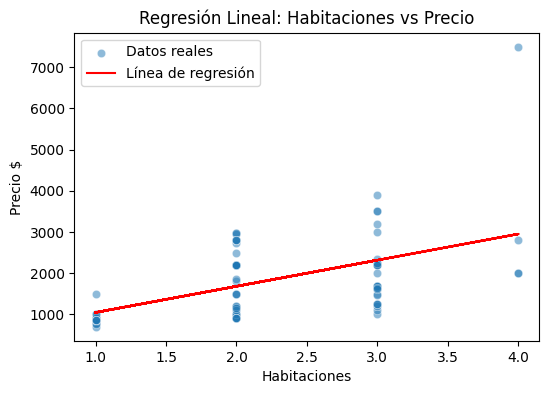


Regresión Lineal: Sanitarios vs Precio
Coeficiente: 931.8942001274696
Intercepto: -252.07584448693433
R^2: 0.5601616990539207
Error cuadrático medio: 414912.6052665124


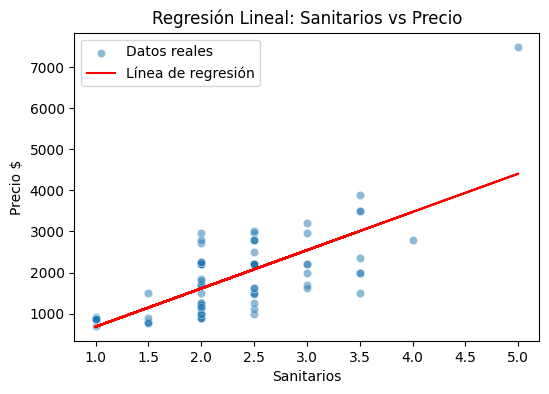


Regresión Lineal: Tamaño mt2 vs Precio
Coeficiente: 8.338344612864026
Intercepto: 453.3112382275758
R^2: 0.8115772978790997
Error cuadrático medio: 177744.76224598472


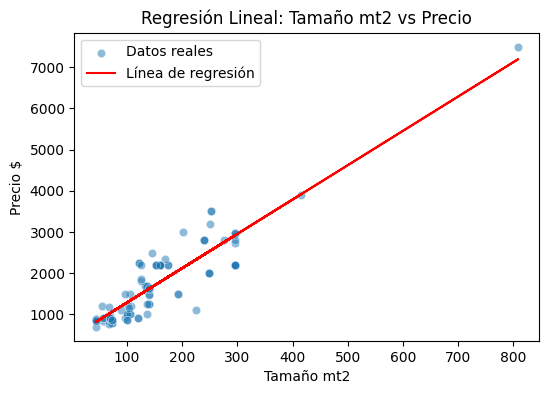


Regresión Lineal: Dormitorios vs Precio
Coeficiente: 635.2374292374293
Intercepto: 411.26107226107206
R^2: 0.2846732713121215
Error cuadrático medio: 674789.0667507931


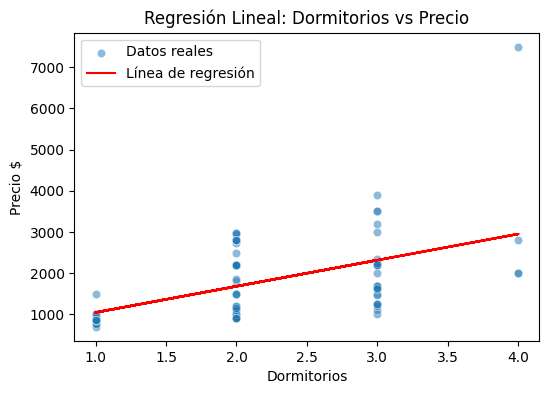

In [19]:
#Chunk 4
X_habitaciones = np.array(df['Habitaciones']).reshape(-1, 1)
X_sanitarios = np.array(df['Sanitarios']).reshape(-1, 1)
X_tamaño = np.array(df['Tamaño mt2']).reshape(-1, 1)
X_Dormitorios = np.array(df['Dormitorios']).reshape(-1, 1)


y = df['Precio $']


regresion_lineal_sklearn(X_habitaciones, y, "Habitaciones")
regresion_lineal_sklearn(X_sanitarios, y, "Sanitarios")
regresion_lineal_sklearn(X_tamaño, y, "Tamaño mt2")
regresion_lineal_sklearn(X_Dormitorios, y, "Dormitorios")



# CONCLUSIONES

### **Coeficiente:** *Este valor indica cuánto cambia el precio (variable dependiente) en promedio por cada unidad que cambia la variable independiente. Por ejemplo, en el modelo de "Tamaño mt2", un coeficiente de 8.34 significa que por cada metro cuadrado adicional, el precio aumenta, en promedio, 8.34 dólares.*

### **Intercepto:** *Es el valor esperado del precio cuando todas las variables independientes son cero. En contextos reales, esto puede no tener sentido práctico, pero matemáticamente, define dónde la línea de regresión cruza el eje y. Por ejemplo, un intercepto de 453.31 en el modelo de "Tamaño mt2" indica el precio base cuando el tamaño es cero.*

### **R² (Coeficiente de determinación):** *Este valor mide la proporción de la variabilidad en la variable dependiente que es predecible a partir de las variables independientes. Un R² de 0.812 en el modelo de "Tamaño mt2" implica que aproximadamente el 81.2% de la variabilidad en el precio puede ser explicada por el tamaño del apartamento. Cuanto más cercano a 1, mejor es el modelo en términos de explicación de la variabilidad.*

### **Error cuadrático medio:** *Es un promedio de los cuadrados de los errores, las diferencias cuadradas entre los valores observados y los valores predichos. Proporciona una idea de cuán bien el modelo se ajusta a los datos; a menor ECM, mejor ajuste. Por ejemplo, el modelo de "Tamaño mt2" tiene un ECM de 177,744.76, indicando que en promedio, la predicción del modelo se desvía del valor real por una cantidad correspondiente a la raíz cuadrada de este valor.*



# **Conclusiones Generales:** 

### *El modelo de "Tamaño mt2" presenta el mejor R² (0.812), lo que indica que es el más eficaz para predecir el precio basado en los datos proporcionados. Un alto R² como este sugiere que el modelo ajusta muy bien a los datos en comparación con los otros modelos evaluados.*

### *La variable "Tamaño mt2" es un predictor mucho más fuerte del precio que "Dormitorios", "Habitaciones" y "Sanitarios". Esto es evidente no solo por el R², sino también por el ECM más bajo, indicando que las predicciones son más precisas y consistentes.*

### *Aunque las variables "Dormitorios" y "Habitaciones" tienen el mismo coeficiente y estadísticas (lo que puede indicar una duplicación de datos o multicolinealidad), su bajo R² implica que no son tan efectivas para predecir el precio de forma aislada como el "Tamaño mt2".*